In [ ]:
# -------------------------------
# Passo 0: Instalar pacotes necessários
# -------------------------------
!pip install ultralytics -q
!pip install torchmetrics -q
!pip install torchvision -q
!pip install PyYAML -q

import torch, os, zipfile, yaml
from ultralytics import YOLO

In [ ]:
# -----------------------------------------
# Passo 1: Definir dispositivo (CPU ou GPU)
# -----------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando o dispositivo: {device}")

Usando o dispositivo: cuda


In [ ]:
# -------------------------------
# Passo 2: Montar Google Drive
# -------------------------------
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# -------------------------------
# Passo 3: Extrair o dataset robocup-v1-18.zip
# -------------------------------
zip_path = "/content/drive/MyDrive/Datasets trabalho final Analise Videos e Imagens/robocup-v1-18.zip"
extract_path = "/content/robocup-v1-18"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print(f"✅ Dataset extraído para: {extract_path}")

✅ Dataset extraído para: /content/robocup-v1-18


In [ ]:
# -------------------------------
# Passo 4: Listar classes a partir do data.yaml
# -------------------------------
yaml_path = os.path.join(extract_path, "data.yaml")

with open(yaml_path, "r") as f:
    data_yaml = yaml.safe_load(f)

classes = data_yaml["names"]

print(f"\n📊 Total de classes: {len(classes)}")
print("Lista de classes:")
for i, cls in enumerate(classes):
    print(f"{i}: {cls}")


📊 Total de classes: 18
Lista de classes:
0: AllenKey
1: Axis2
2: Bearing2
3: Drill
4: F20_20_B
5: F20_20_G
6: Housing
7: M20
8: M20_100
9: M30
10: Motor2
11: S40_40_B
12: S40_40_G
13: Screwdriver
14: Spacer
15: Wrench
16: container_box_blue
17: container_box_red


In [ ]:
# -------------------------------
# Passo 5: Criar modelo YOLO
# -------------------------------
# Começa com YOLOv8 nano (mais leve e rápido). Pode trocar por yolov8s.pt, yolov8m.pt, etc.
model = YOLO("yolov8n.pt")

In [ ]:
# -------------------------------
# Passo 6: Treinar o modelo
# -------------------------------
# results = model.train(
#     data=yaml_path,
#     epochs=3,
#     imgsz=320,
#     batch=8,
#     device=device
# )

results = model.train(
    data=yaml_path,   # usa o data.yaml do robocup-v1-18
    epochs=10,        # ajuste conforme necessário
    imgsz=640,        # tamanho das imagens
    device=device     # usa GPU se disponível
)

engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/robocup-v1-18/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, profile=False, project=None, rect=False, resume=False, r

In [ ]:
# -------------------------------
# Passo 7: Validar o modelo
# -------------------------------
metrics = model.val()
print("\n📈 Métricas de validação:", metrics)

Ultralytics 8.3.202 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,009,158 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 739.6±310.2 MB/s, size: 16.9 KB)
val: Scanning /content/robocup-v1-18/valid/labels.cache... 1708 images, 119 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 1729/1729 3.3Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 109/109 6.0it/s 18.3s
                   all       1729       6933      0.982      0.989      0.992      0.909
              AllenKey        206        206      0.964      0.985      0.993      0.924
                 Axis2        433        439       0.98      0.984      0.992      0.858
              Bearing2        219        219      0.986      0.995      0.992      0.867
                 Drill        195        195      0.995      0.991      0.995      0.938
              F20_20_B        407    


image 1/1 /content/robocup-v1-18/valid/images/m20_100_014_jpg.rf.61940e6eafb071113b70badcbc059a37.jpg: 640x640 1 M20_100, 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train313


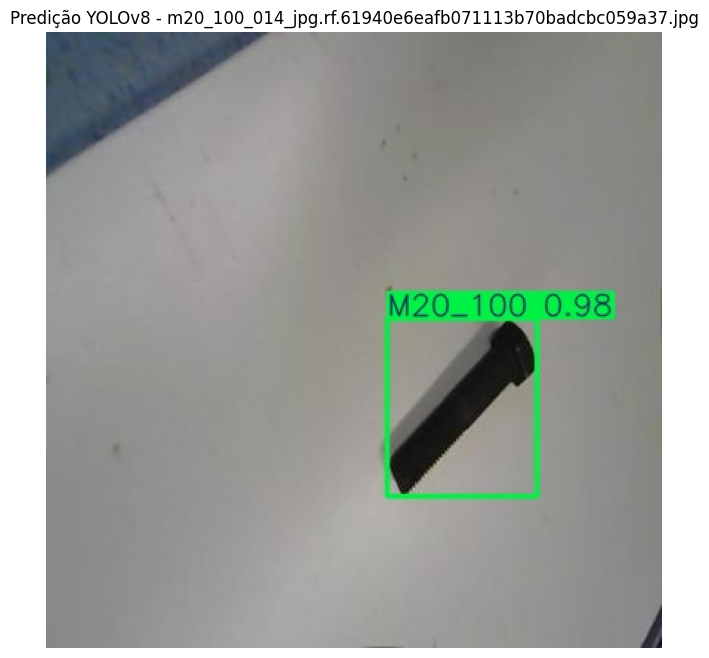


image 1/1 /content/robocup-v1-18/valid/images/set1_frame00118_png.rf.0433f4086f6c73f57f05d67e863ebf10.jpg: 640x640 1 AllenKey, 1 Bearing2, 1 F20_20_B, 1 M30, 1 S40_40_G, 9.3ms
Speed: 3.9ms preprocess, 9.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train314


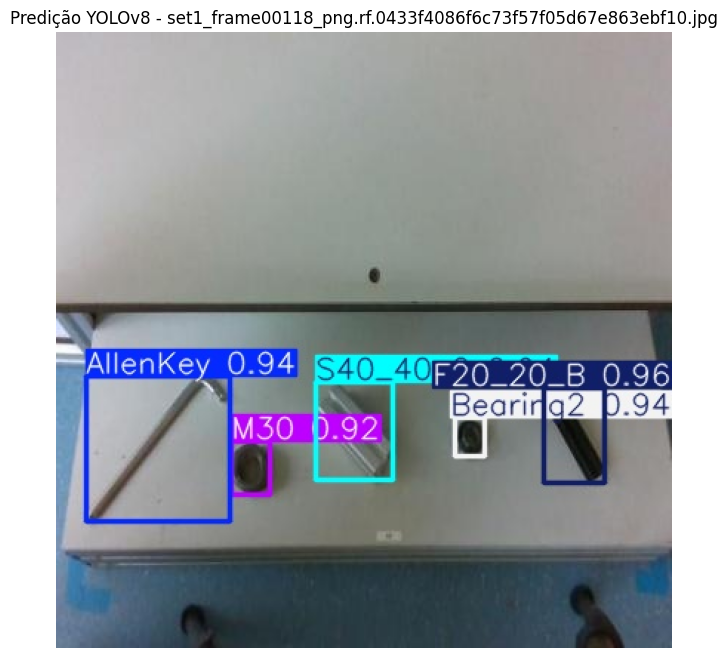


image 1/1 /content/robocup-v1-18/valid/images/frame0161_jpg.rf.de57ccf3dc850693da50669684ecf0c1.jpg: 640x640 1 Axis2, 1 M20, 1 M20_100, 1 Motor2, 1 S40_40_G, 10.2ms
Speed: 3.5ms preprocess, 10.2ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train315


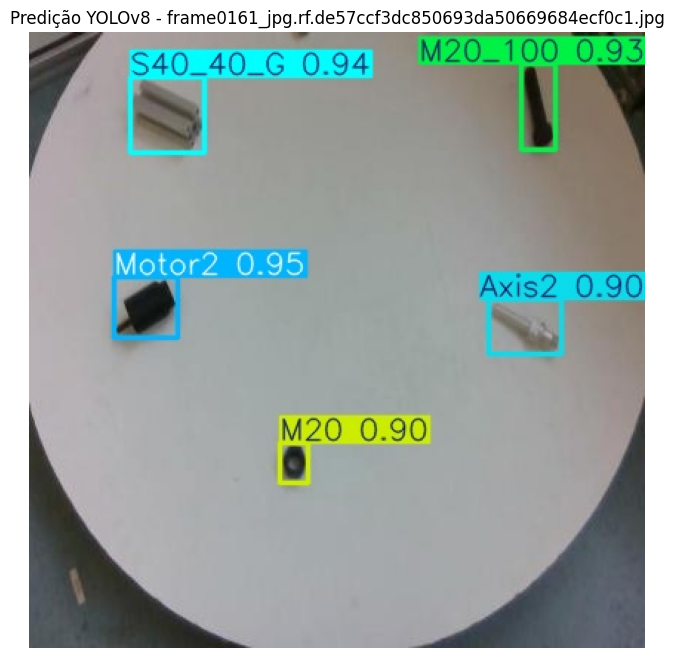


image 1/1 /content/robocup-v1-18/valid/images/frame0024_jpg.rf.821eddd5050ad19e6ddddf460f3b00ea.jpg: 640x640 1 Axis2, 1 F20_20_G, 1 M20, 1 M20_100, 1 S40_40_G, 9.1ms
Speed: 3.5ms preprocess, 9.1ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train316


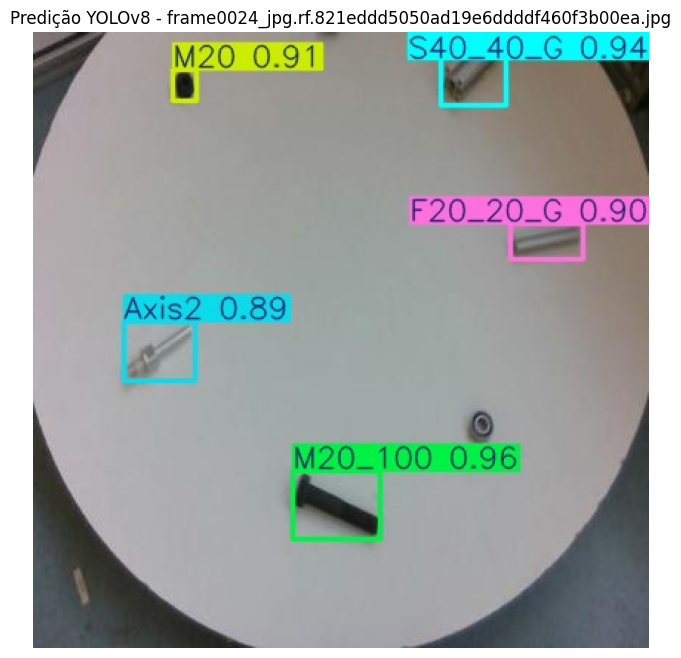


image 1/1 /content/robocup-v1-18/valid/images/set1_frame00459_png.rf.5db2af46bcf41e20694065b51553d242.jpg: 640x640 1 F20_20_B, 1 Housing, 1 M30, 1 S40_40_B, 1 S40_40_G, 9.8ms
Speed: 2.4ms preprocess, 9.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/train317


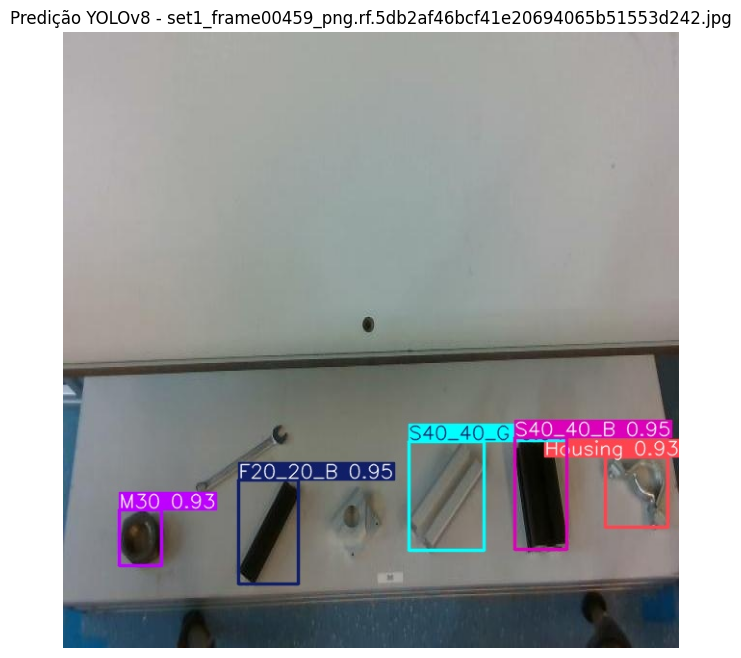

In [ ]:
# -------------------------------
# Passo 8: Testar várias imagens aleatórias e visualizar no Colab
# -------------------------------
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

# Caminho das imagens de validação
test_images_path = os.path.join(extract_path, "valid/images")
all_images = os.listdir(test_images_path)

# Quantas imagens aleatórias mostrar
num_random_images = 5
random_images = random.sample(all_images, num_random_images)

for img_name in random_images:
    test_img = os.path.join(test_images_path, img_name)

    # Realiza a predição (salva resultados)
    results = model.predict(test_img, save=True)

    # Pega o diretório onde a imagem anotada foi salva
    save_dir = results[0].save_dir

    # A imagem salva tem o mesmo nome da original dentro da pasta save_dir
    saved_image_path = os.path.join(save_dir, os.path.basename(test_img))

    # Abre e mostra a imagem no Colab
    img = Image.open(saved_image_path)
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predição YOLOv8 - {img_name}")
    plt.show()